<a href="https://colab.research.google.com/github/tboen1/ConSinGAN/blob/master/PatchExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math
import time
from sklearn.feature_extraction import image 
from skimage.metrics import peak_signal_noise_ratio as psnr
import torch

In [12]:
dark = Image.open('/content/drive/My Drive/Colab/Forked/ConSinGAN/Images/Generation/dark_TMA.jpeg', 'r')
light = Image.open('/content/drive/My Drive/Colab/Forked/ConSinGAN/Images/Generation/light_TMA.jpeg', 'r')

In [13]:
def show(image):
    imshow(np.asarray(image))
    plt.show()

In [14]:
x,y = [500,1300]

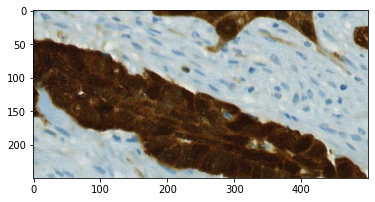

In [15]:
full_patch = dark.crop((x,y,x+500,y+250))
show(full_patch)